#**"Análisis de conglomerados basado del crecimiento económico,indicadores financieros y de rentabilidad en el sector Inmobiliario del Ecuador"**

# **Analisis del Sector Inmobiliario**

---



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive' )

Mounted at /content/drive


##UNION DE TABLAS

In [ ]:
df_2017 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2017.csv' )
df_2018 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2018.csv' )
df_2019 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2019.csv' )
df_2020 = pd.read_csv('/content/drive/My Drive/ProyectoDatasets/indicadores2020.csv' )
data_sectorInmobiliario = pd.concat([df_2017, df_2018, df_2019, df_2020])
data_sectorInmobiliario


,EXPEDIENTE,AÑO,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
0,418,2017,EDIFICACIONES GENERALES MODERNAS SA,L,ACTIVIDADES INMOBILIARIAS.,L6820.01,L68,0.359660,0.359660,0.018459,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
1,463,2017,COMPANIA ANONIMA EMPRESA DE TEATROS Y HOTELES ...,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.069147,0.069147,0.026722,...,0.000000,-0.002129,1.000000,-0.309648,-0.309648,-0.002187,-0.002187,-0.002129,-0.002187,-0.002129
2,492,2017,EMPRESAS CONSOLIDADAS SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.613586,0.613586,0.677718,...,0.000000,0.018985,1.000000,-22.308424,6.578836,-0.199758,0.058909,-0.064378,0.058909,0.018985
3,627,2017,V&C CONSTRUCTORES CIA. LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.582895,0.425929,0.791196,...,0.018535,0.000880,0.330774,0.038942,0.012545,0.013090,0.004217,0.002733,0.004217,0.000880
4,649,2017,CONSTRUCCIONES DEL ECUADOR PAGARIV INNOVA CONS...,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,733898,2020,PRISMAINMOBILIARIACONSTRUCTORA CIA.LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6820.02,L68,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5820,734096,2020,INMOBILIARIA TORMEJIA S.A.S.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,NaN,NaN,0.000000,...,0.000000,0.000050,1.000000,1.000000,1.000000,0.000050,0.000050,0.000050,0.000050,0.000050
5821,734119,2020,IGALCAPE S.A.S.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000
5822,734335,2020,PROMOCOIN S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,NaN,NaN,0.406069,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000


##LIMPIEZA DE TABLAS

In [ ]:
data_sectorInmobiliario.isnull().sum()

EXPEDIENTE                                     0
AÑO                                            0
NOMBRE                                         0
RAMA                                           0
DESCRIPCIÓN RAMA                               0
RAMA 6 DÍGITOS                                 0
SUBRAMA 2 DÍGITOS                              0
LIQUIDEZ CORRIENTE                          8247
PRUEBA ÁCIDA                                8247
ENDEUDAMIENTO DEL ACTIVO                     797
ENDEUDAMIENTO PATRIMONIAL                    759
ENDEUDAMIENTO A CORTO PLAZO                 6213
ENDEUDAMIENTO A LARGO PLAZO                 6213
COBERTURA DE INTERESES                     16827
ENDEUDAMIENTO DEL ACTIVO FIJO               8968
APALANCAMIENTO                               759
APALANCAMIENTO FINANCIERO                   9508
FORTALEZA PATRIMONIAL                        759
ENDEUDAMIENTO PATRIMONIAL CORRIENTE          759
ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE       759
APALANCAMIENTO A COR

In [ ]:
data_sectorInmobiliario.dropna(inplace=True)
data_sectorInmobiliario.fillna(data_sectorInmobiliario.mean())
data_sectorInmobiliario

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,EXPEDIENTE,AÑO,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
3,627,2017,V&C CONSTRUCTORES CIA. LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.582895,0.425929,0.791196,...,0.018535,0.000880,0.330774,0.038942,0.012545,0.013090,0.004217,0.002733,0.004217,0.000880
7,1016,2017,PARQUE INDUSTRIAL IMBABURA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,128.936190,86.193932,0.007750,...,0.001197,0.085583,0.887158,0.295875,0.555489,0.045941,0.086251,0.045585,0.086251,0.085583
21,1960,2017,INMOBILIARIA SANTA PRISCA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.578023,0.292705,0.628487,...,0.000433,-0.038027,0.390626,-0.282979,-0.157528,-0.183871,-0.102356,-0.068310,-0.102356,-0.038027
97,4498,2017,INMOBILIARIA SANTA RITA C LTDA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.506396,0.506396,0.032114,...,0.006700,0.016651,0.801948,0.108158,0.067265,0.027662,0.017203,0.026774,0.017203,0.016651
215,6588,2017,AZUAY NUEVO MILENIO (ANUMIL) S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,4.595738,4.416759,0.121226,...,0.002113,0.002072,0.826761,0.631957,0.007273,0.204850,0.002358,0.180017,0.002358,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,706548,2020,ECUAINMOBILIARIA S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.018148,0.245759,0.938917,...,0.008027,0.031246,0.253817,0.052363,0.039561,0.677048,0.511524,0.041356,0.511524,0.031246
5457,710409,2020,BLACKPETROL S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.413486,1.413486,0.444677,...,0.000974,0.066736,0.214372,0.025787,0.025693,0.120617,0.120175,0.066981,0.120175,0.066736
5548,716551,2020,IXORA ROAD COMPANY INC,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,9.865096,3.030359,0.059636,...,0.028961,0.000329,0.042822,0.030882,0.001488,0.007271,0.000350,0.006838,0.000350,0.000329
5618,720493,2020,IMTERRA CIA.LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,29.216570,7.806854,0.995147,...,0.048210,0.006915,0.183187,0.105648,0.050722,2.967777,1.424857,0.014402,1.424857,0.006915


#**Columnas**

In [ ]:
data_sectorInmobiliario.columns

Index(['EXPEDIENTE', 'AÑO', 'NOMBRE', 'RAMA', 'DESCRIPCIÓN RAMA',
       'RAMA 6 DÍGITOS', 'SUBRAMA 2 DÍGITOS', 'LIQUIDEZ CORRIENTE',
       'PRUEBA ÁCIDA', 'ENDEUDAMIENTO DEL ACTIVO', 'ENDEUDAMIENTO PATRIMONIAL',
       'ENDEUDAMIENTO A CORTO PLAZO', 'ENDEUDAMIENTO A LARGO PLAZO',
       'COBERTURA DE INTERESES', 'ENDEUDAMIENTO DEL ACTIVO FIJO',
       'APALANCAMIENTO', 'APALANCAMIENTO FINANCIERO', 'FORTALEZA PATRIMONIAL',
       'ENDEUDAMIENTO PATRIMONIAL CORRIENTE',
       'ENDEUDAMIENTO PATRIMONIAL NO CORRIENTE',
       'APALANCAMIENTO A CORTO Y LARGO PLAZO', 'ROTACIÓN DE CARTERA',
       'ROTACIÓN DE ACTIVO FIJO', 'ROTACIÓN DE VENTAS',
       'PERIODO MEDIO DE COBRANZA CORTO PLAZO',
       'PERIODO MEDIO DE PAGO CORTO PLAZO',
       'IMPACTO GASTOS ADMINISTRACIÓN Y VENTAS',
       'IMPACTO DE LA CARGA FINANCIERA', 'RENTABILIDAD NETA DEL ACTIVO',
       'MARGEN BRUTO', 'MARGEN OPERACIONAL', 'RENTABILIDAD NETA DE VENTAS',
       'RENTABILIDAD OPERACIONAL DEL PATRIMONIO', 'RENTABLIDA

In [ ]:
data_sectorInmobiliario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 3 to 5770
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EXPEDIENTE                               899 non-null    int64  
 1   AÑO                                      899 non-null    int64  
 2   NOMBRE                                   899 non-null    object 
 3   RAMA                                     899 non-null    object 
 4   DESCRIPCIÓN RAMA                         899 non-null    object 
 5   RAMA 6 DÍGITOS                           899 non-null    object 
 6   SUBRAMA 2 DÍGITOS                        899 non-null    object 
 7   LIQUIDEZ CORRIENTE                       899 non-null    float64
 8   PRUEBA ÁCIDA                             899 non-null    float64
 9   ENDEUDAMIENTO DEL ACTIVO                 899 non-null    float64
 10  ENDEUDAMIENTO PATRIMONIAL                899 non-

#**Numero De Datos Fila**

In [ ]:
len(data_sectorInmobiliario)

899

#**Hipotesis**

Según los datos de Supercia indicadores de 2018 a 2020 , el sector inmobiliario mantuvo una tendencia disminución con los años anteriores, su pico alto es en el  2017, esto se debió a que esos años 2019 -2020 se dio la pandemia donde afecto al sector inmobiliario, no a gran escala pero si a disminuir la ganancias de ecuador




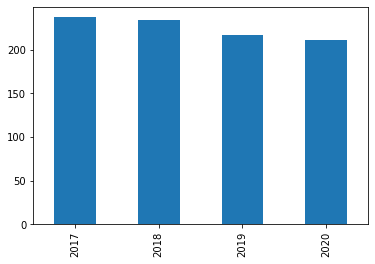

In [ ]:
data_sectorInmobiliario['AÑO'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc04edf2290>,
      dtype=object)

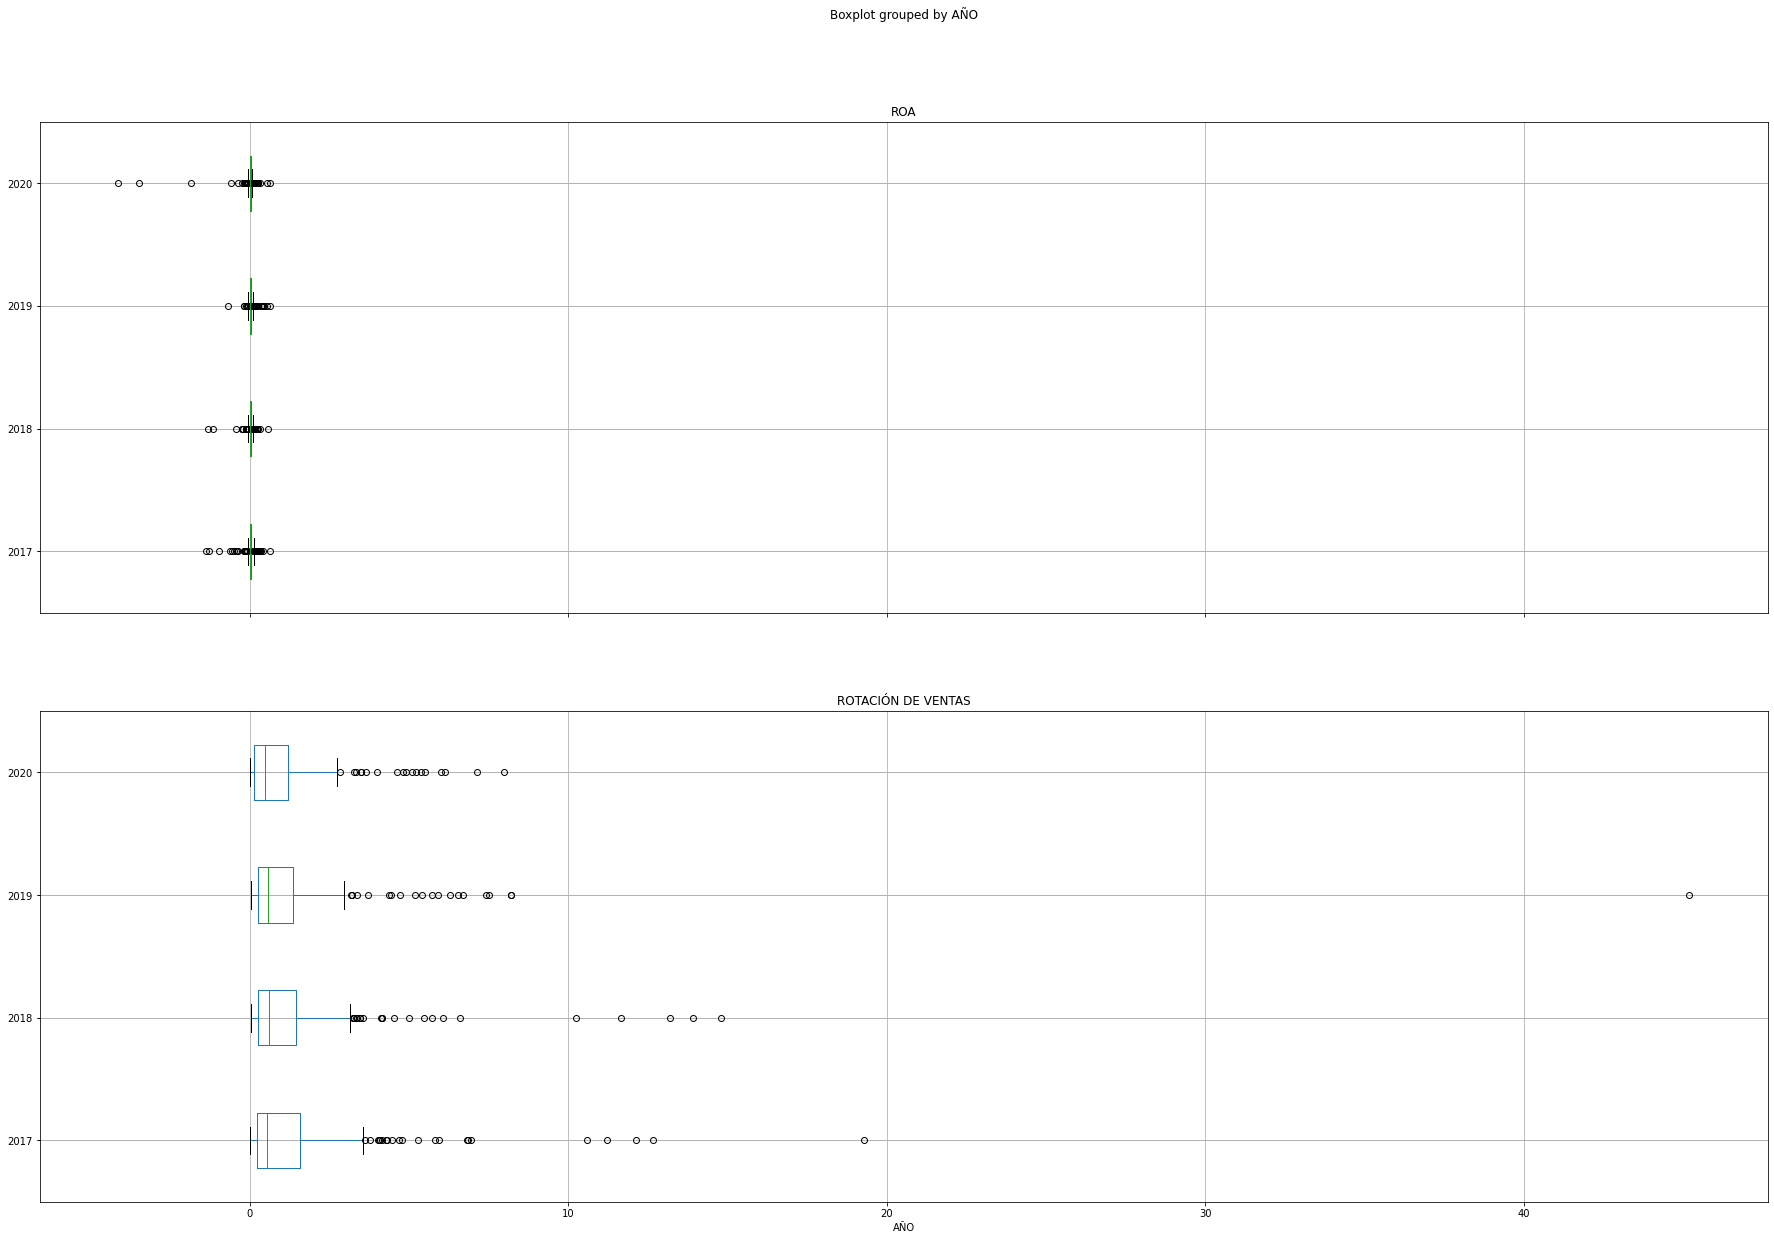

In [ ]:
data_sectorInmobiliario.boxplot(vert=False, by='AÑO', column=['ROA','ROTACIÓN DE VENTAS'],figsize=(30,20),layout=(-1, 1))

En cambio, en la situación de rentabilidad financiero entre trascurso de los años han tenido cambios tanto en los años 2017 se ha visto un aumento mínimo para el 2018 en cambio para el transcurso del año 2019 se puede observar que esa rentabilidad tuvo deflación, que se disminuyó hasta un mínimo de -2500 por motivos del comienzo de la pandemia, ya para el 2020 cambio drásticamente con un aumento elevado llegando a obtener una rentabilidad hasta de 4000 teniendo una gran demanda de rentabilidad.

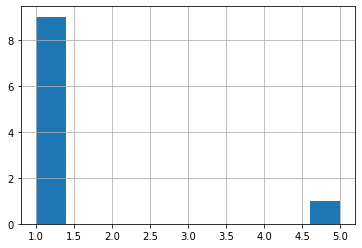

In [ ]:
data_sectorInmobiliario['RENTABILIDAD NETA DE VENTAS'].value_counts().head(10).hist()

Correlacion 

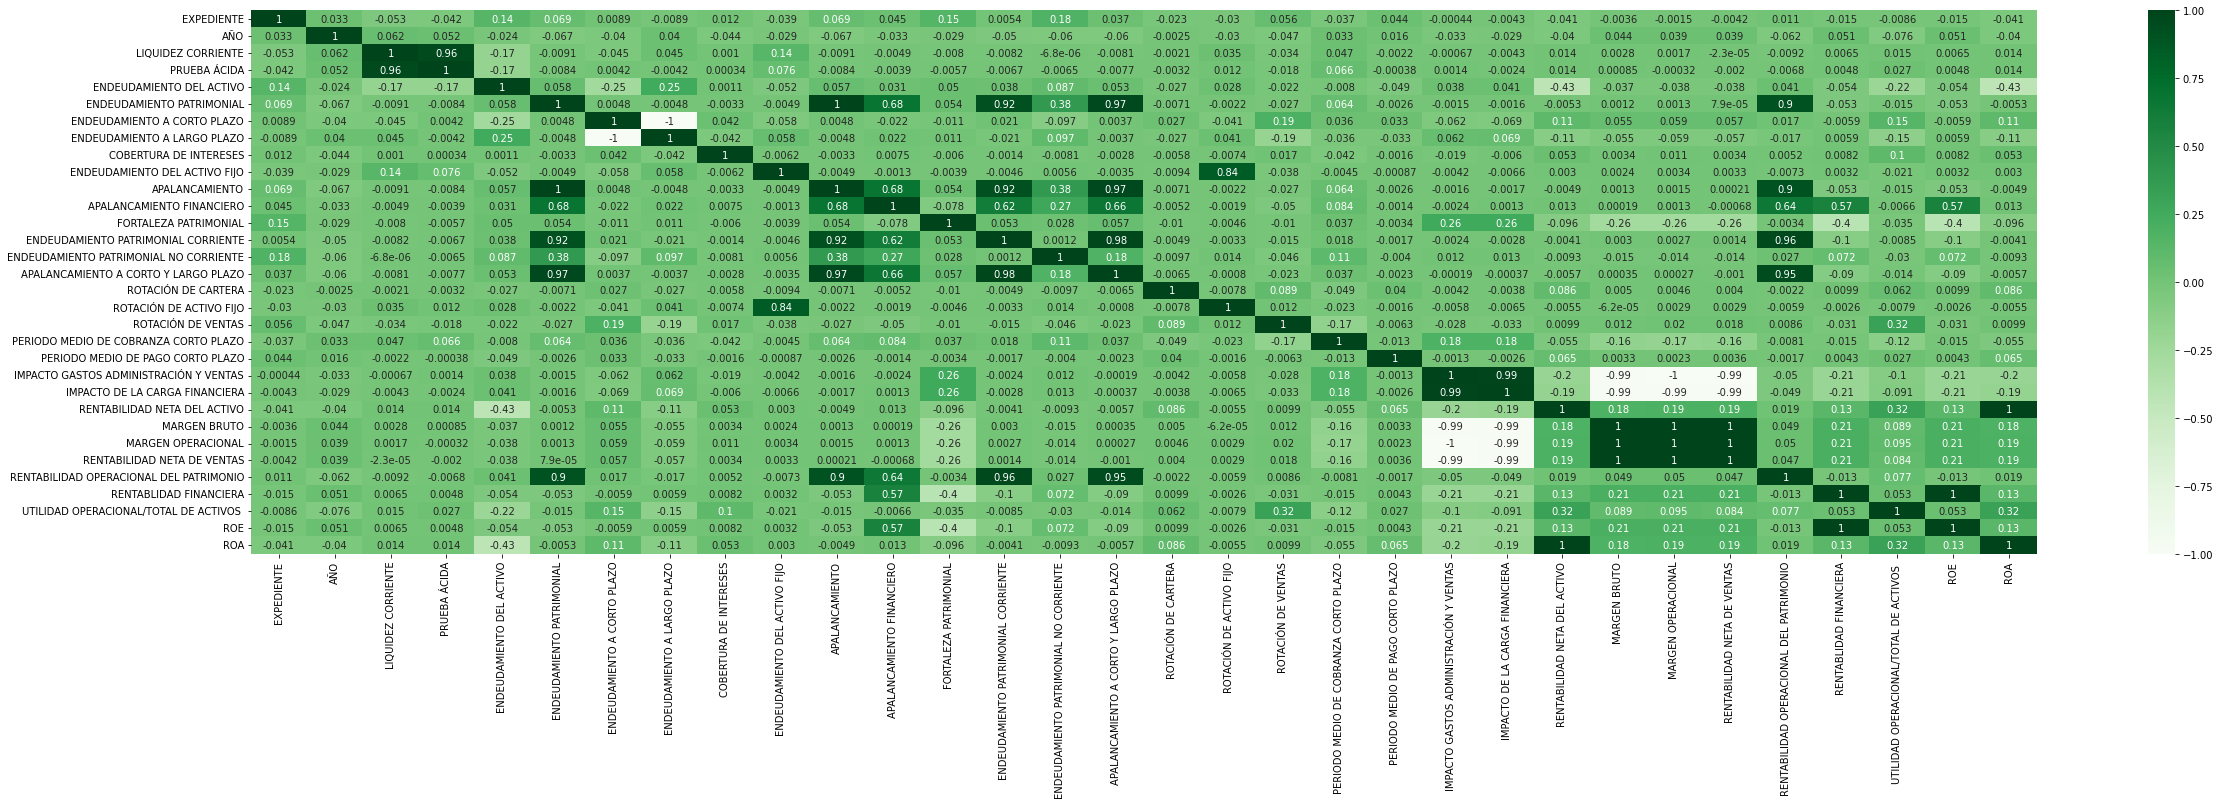

In [ ]:
plt.figure(figsize=(40,10))
sns.heatmap(data_sectorInmobiliario.corr(),vmin=-1, vmax=1, annot=True, cmap="Greens")

In [ ]:
dfs = data_sectorInmobiliario[['LIQUIDEZ CORRIENTE','ENDEUDAMIENTO PATRIMONIAL','APALANCAMIENTO A CORTO Y LARGO PLAZO','RENTABLIDAD FINANCIERA','RENTABILIDAD NETA DE VENTAS','RENTABILIDAD OPERACIONAL DEL PATRIMONIO',
                               'UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROTACIÓN DE ACTIVO FIJO','ROTACIÓN DE VENTAS','MARGEN BRUTO','ENDEUDAMIENTO DEL ACTIVO FIJO','ROA','ROE']]
dfs.columns = ['LIQUIDEZ_CORRIENTE','ENDEUDAMIENTO_PATRIMONIAL','APALANCAMIENTO_CORTO_LARGO PLAZO','RENTABLIDAD_FINANCIERA','RENTABILIDAD_NETA_VENTAS','RENTABILIDAD OPERACIONAL_PATRIMONIO','UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS',
               'ROTACIÓN_ACTIVO_FIJO','ROTACIÓN_VENTAS','MARGEN_BRUTO','ENDEUDAMIENTO_ACTIVO_FIJO','ROA','ROE']
#dfs.fillna(method='ffill', inplace=True)

In [ ]:
dfs.corr()

,LIQUIDEZ_CORRIENTE,ENDEUDAMIENTO_PATRIMONIAL,APALANCAMIENTO_CORTO_LARGO PLAZO,RENTABLIDAD_FINANCIERA,RENTABILIDAD_NETA_VENTAS,RENTABILIDAD OPERACIONAL_PATRIMONIO,UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS,ROTACIÓN_ACTIVO_FIJO,ROTACIÓN_VENTAS,MARGEN_BRUTO,ENDEUDAMIENTO_ACTIVO_FIJO,ROA,ROE
LIQUIDEZ_CORRIENTE,1.000000,-0.009129,-0.008085,0.006513,-0.000023,-0.009227,0.014930,0.035379,-0.033528,0.002776,0.138583,0.014066,0.006513
ENDEUDAMIENTO_PATRIMONIAL,-0.009129,1.000000,0.974018,-0.053422,0.000079,0.899796,-0.015413,-0.002222,-0.026550,0.001163,-0.004907,-0.005278,-0.053422
APALANCAMIENTO_CORTO_LARGO PLAZO,-0.008085,0.974018,1.000000,-0.089870,-0.001044,0.953085,-0.013690,-0.000796,-0.022978,0.000353,-0.003525,-0.005726,-0.089870
RENTABLIDAD_FINANCIERA,0.006513,-0.053422,-0.089870,1.000000,0.207636,-0.013091,0.052955,-0.002641,-0.031257,0.206544,0.003237,0.129729,1.000000
RENTABILIDAD_NETA_VENTAS,-0.000023,0.000079,-0.001044,0.207636,1.000000,0.047040,0.084384,0.002879,0.017620,0.996905,0.003277,0.193802,0.207636
RENTABILIDAD OPERACIONAL_PATRIMONIO,-0.009227,0.899796,0.953085,-0.013091,0.047040,1.000000,0.076641,-0.005879,0.008648,0.049295,-0.007325,0.019485,-0.013091
UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS,0.014930,-0.015413,-0.013690,0.052955,0.084384,0.076641,1.000000,-0.007871,0.319493,0.089317,-0.021073,0.316462,0.052955
ROTACIÓN_ACTIVO_FIJO,0.035379,-0.002222,-0.000796,-0.002641,0.002879,-0.005879,-0.007871,1.000000,0.011746,-0.000062,0.844384,-0.005459,-0.002641
ROTACIÓN_VENTAS,-0.033528,-0.026550,-0.022978,-0.031257,0.017620,0.008648,0.319493,0.011746,1.000000,0.011959,-0.037749,0.009883,-0.031257
MARGEN_BRUTO,0.002776,0.001163,0.000353,0.206544,0.996905,0.049295,0.089317,-0.000062,0.011959,1.000000,0.002443,0.184084,0.206544


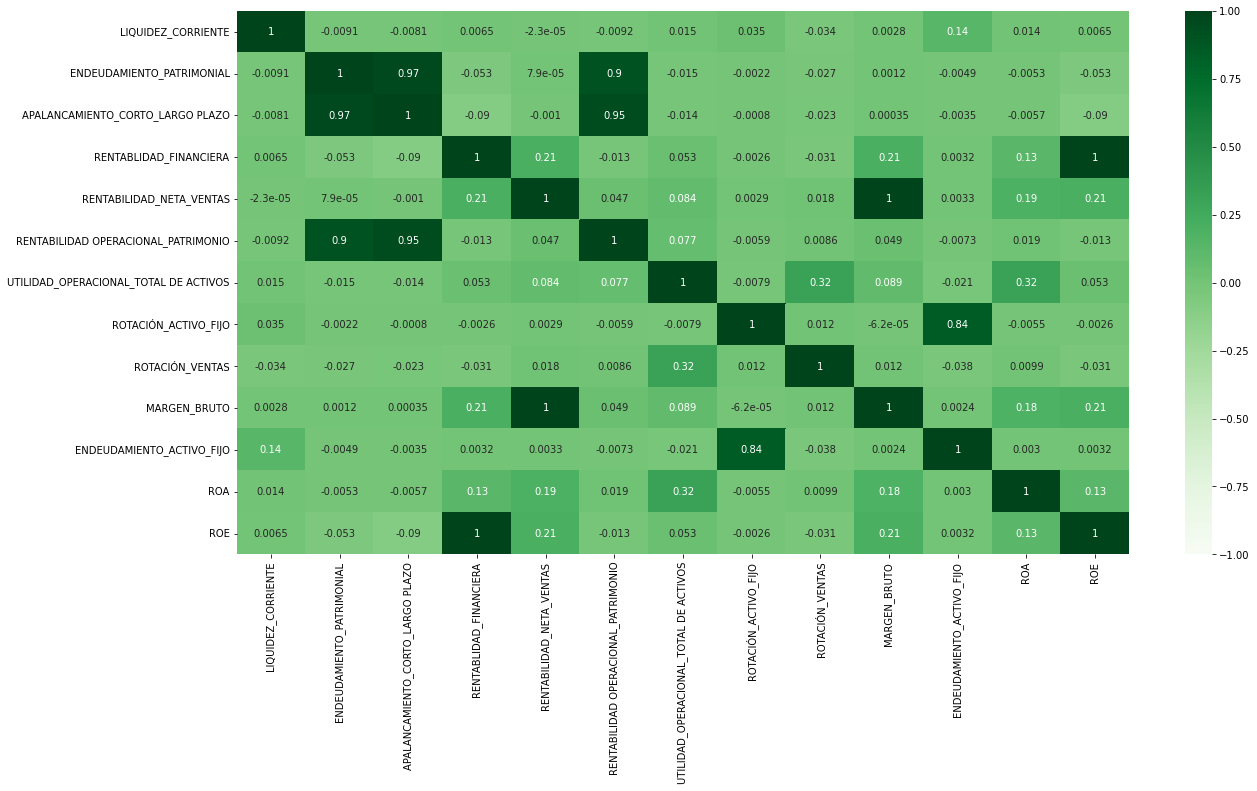

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dfs.corr(),vmin=-1, vmax=1, annot=True, cmap="Greens")

podemos ver que aun que tiene muy pocas personas que realizan endeudamiento a corto y largo plazo podemos ver que, en la gráfica, que para obtener ese activo su tiempo son menos de 1 año la gran mayoría

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc04b59b850>,
      dtype=object)

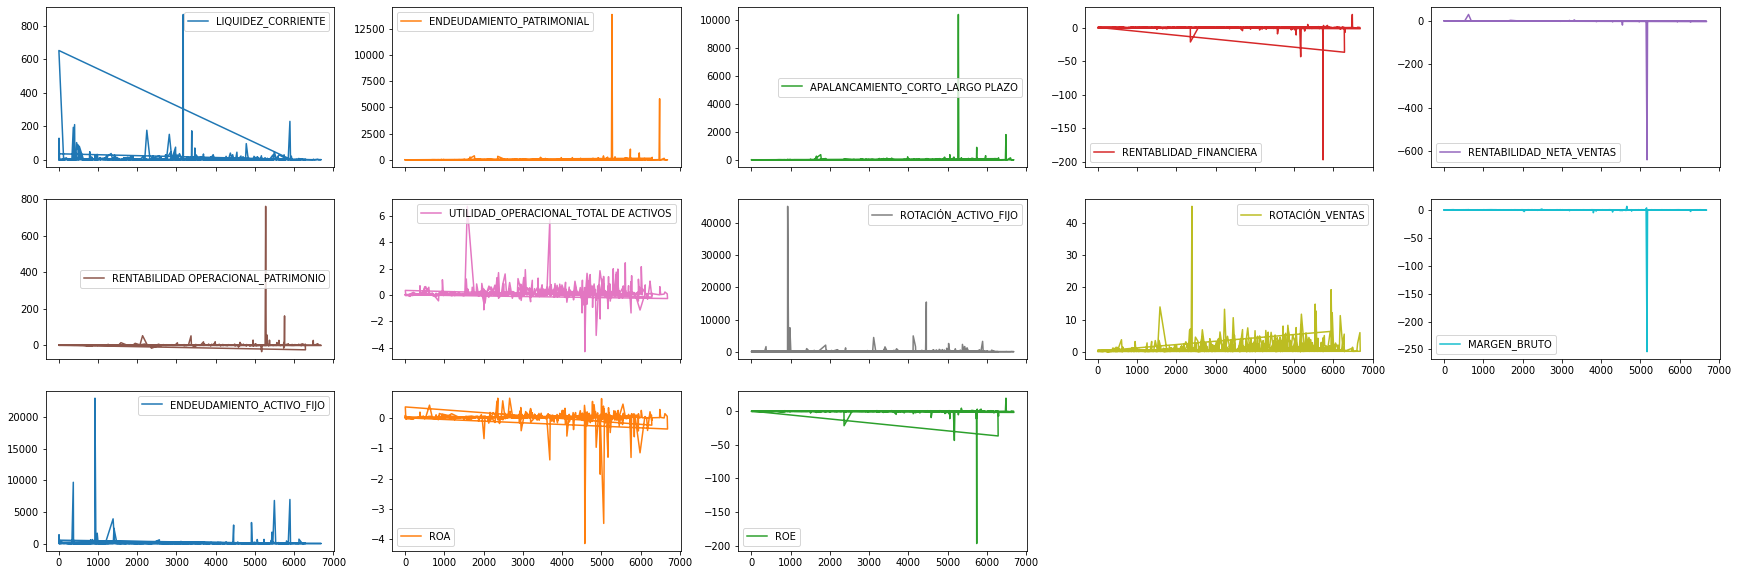

In [ ]:
dfs.plot(subplots=True, layout=(-1,5), figsize=(30,10) )

### **Análisis**
Como podemos observar estos resultados reflejan un bajo nivel de concentración, no existe correlacion ya hay un punto su rentabilidad intenta poder convertir las ventas en beneficios, pero su rotacion de venta no aumenta con la comparacion que realizamos con los años  2017-2020 no se ve un amento elevado pero tampoco han obtenido demasaiadas perdidas, se han podido restabilizar,
En la grafica de la liquidez corriente a  tenido un pico alto 120000 lo cual existe una gran entidad en activos corrientes, por cada peso de deuda que tengan aun que si comparamos la graficas de endeunamiento a corta y largo plazo son muy bajas esto  puede ser por que existe muy baja rentabilidad de ventas y mal manejo de activos activos ya que igualmente existe un baja en su indicardor ROA ya que no esta reduciendo ni costos, ni aumentando su utilidad.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

#**CLUSTERS**

##**CLUSTER - KMEANS**


###**ANTES DE PANDEMIA**

In [ ]:
AL_ANTES_PANDEMIA = data_sectorInmobiliario[(data_sectorInmobiliario.AÑO >= 2017 ) & ( data_sectorInmobiliario.AÑO <= 2018)]
AL_ANTES_PANDEMIA

,EXPEDIENTE,AÑO,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
3,627,2017,V&C CONSTRUCTORES CIA. LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.582895,0.425929,0.791196,...,0.018535,0.000880,0.330774,0.038942,0.012545,0.013090,0.004217,0.002733,0.004217,0.000880
7,1016,2017,PARQUE INDUSTRIAL IMBABURA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,128.936190,86.193932,0.007750,...,0.001197,0.085583,0.887158,0.295875,0.555489,0.045941,0.086251,0.045585,0.086251,0.085583
21,1960,2017,INMOBILIARIA SANTA PRISCA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.578023,0.292705,0.628487,...,0.000433,-0.038027,0.390626,-0.282979,-0.157528,-0.183871,-0.102356,-0.068310,-0.102356,-0.038027
97,4498,2017,INMOBILIARIA SANTA RITA C LTDA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.506396,0.506396,0.032114,...,0.006700,0.016651,0.801948,0.108158,0.067265,0.027662,0.017203,0.026774,0.017203,0.016651
215,6588,2017,AZUAY NUEVO MILENIO (ANUMIL) S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,4.595738,4.416759,0.121226,...,0.002113,0.002072,0.826761,0.631957,0.007273,0.204850,0.002358,0.180017,0.002358,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,702297,2018,B&B ASOCIADOS ''BBBUILD'' CIA.LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.816985,0.816985,1.223614,...,0.001796,-0.000154,0.352478,0.000801,-0.000995,0.000555,-0.000689,0.000124,-0.000689,-0.000154
6206,706442,2018,CITIMED HOTEL HOSPEDAJE ABC2016 CIA.LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,3.922641,2.930294,0.989035,...,0.022157,0.003842,0.853611,0.371717,0.016067,8.106845,0.350403,0.088890,0.350403,0.003842
6279,710409,2018,BLACKPETROL S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.122021,1.077805,0.736001,...,0.000079,0.087947,0.127055,0.016813,0.016112,0.347644,0.333135,0.091778,0.333135,0.087947
6280,710523,2018,CONSTRUCTORA INMOBILIARIA PAROLUGON RODRIGUEZ ...,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.198762,1.198762,0.975225,...,0.019376,-0.007576,0.475973,0.469565,-0.021493,6.681216,-0.305809,0.165527,-0.305809,-0.007576


In [ ]:
AL_ANTES_PANDEMIA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 3 to 6286
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EXPEDIENTE                               471 non-null    int64  
 1   AÑO                                      471 non-null    int64  
 2   NOMBRE                                   471 non-null    object 
 3   RAMA                                     471 non-null    object 
 4   DESCRIPCIÓN RAMA                         471 non-null    object 
 5   RAMA 6 DÍGITOS                           471 non-null    object 
 6   SUBRAMA 2 DÍGITOS                        471 non-null    object 
 7   LIQUIDEZ CORRIENTE                       471 non-null    float64
 8   PRUEBA ÁCIDA                             471 non-null    float64
 9   ENDEUDAMIENTO DEL ACTIVO                 471 non-null    float64
 10  ENDEUDAMIENTO PATRIMONIAL                471 non-

In [ ]:
from pandas.core.reshape.merge import string
from tables.table import Column
dfa_ANTES = AL_ANTES_PANDEMIA[['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROA','ROTACIÓN DE VENTAS']]
print('Total Row : ', len(dfa_ANTES))

sc_dfa_ANTES = StandardScaler()
dfa_std_ANTES = sc_dfa_ANTES.fit_transform(dfa_ANTES.astype(object))

Total Row :  471


In [ ]:
dfa_ANTES.sample(5)

,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROA,ROTACIÓN DE VENTAS
2958,-0.420970,-0.424644,0.243887
859,-0.039047,0.006636,0.233259
2584,0.111130,0.051530,0.480006
3791,-0.081367,0.025799,4.087847
3575,0.013985,0.007636,1.100216


In [ ]:
dfa_std_ANTES

array([[-0.30599552, -0.06707408, -0.57897416],
       [-0.23144   ,  0.45123465, -0.54031128],
       [-0.42960167, -0.30515448, -0.50005858],
       ...,
       [-0.15107026,  0.4657049 ,  1.90469322],
       [-0.02275655, -0.11882326, -0.44884319],
       [-0.59435248, -1.54459984, -0.33365777]])

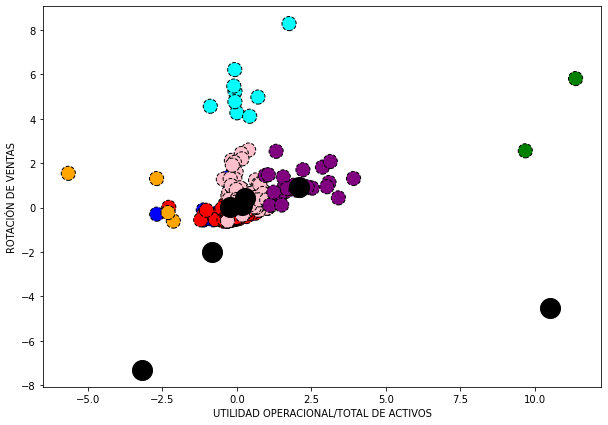

In [ ]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=12).fit(dfa_std_ANTES)
labels = kmeans.labels_
new_dfa_ANTES = pd.DataFrame(data = dfa_std_ANTES, columns =['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROA','ROTACIÓN DE VENTAS'])
new_dfa_ANTES['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
colorclu = ['blue','red','green','cyan','pink','orange','purple']
for i in range(n_clusters):
  plt.scatter(new_dfa_ANTES["UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS "][new_dfa_ANTES["label_kmeans"] == i], new_dfa_ANTES["ROTACIÓN DE VENTAS"][new_dfa_ANTES["label_kmeans"] == i], 
            color = colorclu[i], s=200, edgecolor='black',linestyle='--',marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400);
ax.set_xlabel('UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS')
ax.set_ylabel('ROTACIÓN DE VENTAS')
plt.show()

**Analisis**

Se puede identificar en la grafica de los años 2017-2018 antes de pandemia se que :
puede observar que 

1.   las empresas grandes del sector inmobiliario tiene muy poca rotacion de ventas con una elevada utilidad lo cual  no existe tanto rotacion financiera comparada con las empresas medianas.
2.   las empresas medianas aunque tiene poca utilidad que de las empesas grandes tienen un mayor control de rotacion de ventas lo cual estan generando una mayor rotacion de dinero
3.   las empresa pequeñas desde estos dos años ya tenian muy poca utilidades lo cual genereban muy poca rotacion pero aun asi se mantenian en el sector 





###**DESPUES DE PANDEMIA**

In [ ]:
DURANTE_PANDEMIA = data_sectorInmobiliario[(data_sectorInmobiliario.AÑO >= 2019 ) & ( data_sectorInmobiliario.AÑO <= 2020)]
DURANTE_PANDEMIA

,EXPEDIENTE,AÑO,NOMBRE,RAMA,DESCRIPCIÓN RAMA,RAMA 6 DÍGITOS,SUBRAMA 2 DÍGITOS,LIQUIDEZ CORRIENTE,PRUEBA ÁCIDA,ENDEUDAMIENTO DEL ACTIVO,...,IMPACTO DE LA CARGA FINANCIERA,RENTABILIDAD NETA DEL ACTIVO,MARGEN BRUTO,MARGEN OPERACIONAL,RENTABILIDAD NETA DE VENTAS,RENTABILIDAD OPERACIONAL DEL PATRIMONIO,RENTABLIDAD FINANCIERA,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROE,ROA
6,1016,2019,PARQUE INDUSTRIAL IMBABURA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,36.031315,27.147322,0.027692,...,0.000114,0.359176,0.720801,0.585940,0.621131,0.348477,0.369405,0.338827,0.369405,0.359176
18,1960,2019,INMOBILIARIA SANTA PRISCA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,0.314203,0.109892,0.665762,...,0.026406,-0.015727,0.516061,-0.160880,-0.094711,-0.079929,-0.047055,-0.026715,-0.047055,-0.015727
186,6108,2019,INMOBILIARIA PAUCARBAMBA SA,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,2.041195,2.004024,0.288509,...,0.081489,-0.000382,0.681978,-0.041260,-0.001229,-0.018022,-0.000537,-0.012823,-0.000537,-0.000382
192,6588,2019,AZUAY NUEVO MILENIO (ANUMIL) S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,5.517212,5.437244,0.133931,...,0.000832,0.002824,0.854654,0.611544,0.010255,0.194443,0.003260,0.168401,0.003260,0.002824
365,9688,2019,SALCEDO INTERNACIONAL (INTERSAL) S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.556598,0.472904,0.573473,...,0.036708,0.006048,0.391097,0.107804,0.059890,0.025523,0.014179,0.010886,0.014179,0.006048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,706548,2020,ECUAINMOBILIARIA S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.018148,0.245759,0.938917,...,0.008027,0.031246,0.253817,0.052363,0.039561,0.677048,0.511524,0.041356,0.511524,0.031246
5457,710409,2020,BLACKPETROL S.A.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,1.413486,1.413486,0.444677,...,0.000974,0.066736,0.214372,0.025787,0.025693,0.120617,0.120175,0.066981,0.120175,0.066736
5548,716551,2020,IXORA ROAD COMPANY INC,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,9.865096,3.030359,0.059636,...,0.028961,0.000329,0.042822,0.030882,0.001488,0.007271,0.000350,0.006838,0.000350,0.000329
5618,720493,2020,IMTERRA CIA.LTDA.,L,ACTIVIDADES INMOBILIARIAS.,L6810.01,L68,29.216570,7.806854,0.995147,...,0.048210,0.006915,0.183187,0.105648,0.050722,2.967777,1.424857,0.014402,1.424857,0.006915


In [ ]:
from pandas.core.reshape.merge import string
from tables.table import Column
DURANTE = DURANTE_PANDEMIA[['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROA','ROTACIÓN DE VENTAS']]
print('Total Row : ', len(DURANTE))

sc_dfa_DURANTE = StandardScaler()
dfa_std_DURANTE = sc_dfa_DURANTE.fit_transform(DURANTE.astype(object))

Total Row :  428


In [ ]:
DURANTE.sample(5)

,UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS,ROA,ROTACIÓN DE VENTAS
2633,0.027718,0.011056,0.357123
3030,0.012233,-0.004072,0.271288
5133,0.156726,0.055973,0.694632
1883,-0.020905,-0.001212,0.482648
365,0.010886,0.006048,0.100983


In [ ]:
dfa_std_DURANTE

array([[ 0.58617224,  1.20067855, -0.23549873],
       [-0.39398631, -0.06398361, -0.39451371],
       [-0.35673527, -0.01221824, -0.33868342],
       ...,
       [-0.30401844, -0.00981906, -0.37316038],
       [-0.28373527,  0.01239473, -0.40598486],
       [-0.30721034,  0.06334201, -0.21205978]])

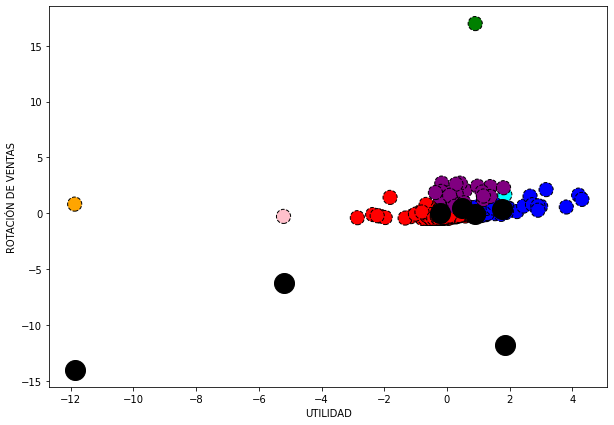

In [ ]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=12).fit(dfa_std_DURANTE)
labels = kmeans.labels_
new_dfa_DURANTE = pd.DataFrame(data = dfa_std_DURANTE, columns =['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ROA','ROTACIÓN DE VENTAS'])
new_dfa_DURANTE['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
colorclu = ['blue','red','green','cyan','pink','orange','purple']
for i in range(n_clusters):
  plt.scatter(new_dfa_DURANTE["UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS "][new_dfa_DURANTE["label_kmeans"] == i], new_dfa_DURANTE["ROTACIÓN DE VENTAS"][new_dfa_DURANTE["label_kmeans"] == i], 
            color = colorclu[i], s=200, edgecolor='black',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400);
ax.set_xlabel('UTILIDAD')
ax.set_ylabel('ROTACIÓN DE VENTAS')
plt.show()

**Análisis**

En los años 2019-2020 que fue durante de pandemia muchas empresas tuvieron que cerrar ya que no tenian ventas sus utilidades bajaron:

1.   Las empresas grandes en la grafica se puede obserbar que se han reducidos y se han disminuido su utilidades operacionales aunque hay muy pocas que se han podido adaptar aun que tenga la misma utilidad su rotacion de venta ha sido baja

2.   la diferencia de empresas medianas en estos se han podido adaptar de otra forma ya que no han disminuido tanto su utilidades y ni tanto sus ventas 

3.   la empresas pequeñas se puede identificar que en el transcurso de esos años quebraron ya que no podian solventar con sus endeudamiento por que no tenian utilidades negativas y muy pocas ventas






## **CLUSTER DBSCAN**

###**ANTES DE PANDEMIA**


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
x_ANTES = AL_ANTES_PANDEMIA.iloc[:,[32,8]].values
x_ANTES

array([[ 1.3089924e-02,  4.2592913e-01],
       [ 4.5940619e-02,  8.6193932e+01],
       [-1.8387063e-01,  2.9270515e-01],
       [ 2.7661853e-02,  5.0639558e-01],
       [ 2.0484973e-01,  4.4167590e+00],
       [-1.2393744e-02,  5.4513991e-01],
       [ 1.8706415e-02,  4.4846800e-01],
       [ 8.8089776e-01,  8.5065355e+00],
       [ 9.9455146e-04,  6.6887456e-01],
       [ 1.8495405e-01,  2.7218704e+00],
       [-5.4829669e+00,  2.3052028e-01],
       [-6.0905766e-02,  4.4602032e+00],
       [ 3.1363338e-02,  2.1883256e+00],
       [ 1.5970552e-01,  8.1264931e-01],
       [ 3.6681242e-02,  3.6127481e-01],
       [ 8.1991188e-02,  1.4792266e-01],
       [-7.8981429e-01,  3.3371501e+00],
       [ 4.9796531e-01,  6.9169712e-01],
       [ 1.1956402e-01,  4.8210660e-01],
       [ 2.8527865e-01,  1.7552951e-01],
       [ 4.8660908e-02,  1.3327826e+01],
       [ 4.3204468e-01,  1.0530339e+00],
       [ 3.3105049e-02,  4.0225697e-01],
       [ 1.7221145e-01,  6.9156346e+00],
       [ 4.89277

In [ ]:
dbs_ANTES = DBSCAN(eps=4,min_samples=10)

In [ ]:
model_dbs_ANTES = dbs_ANTES.fit(x_ANTES)

In [ ]:
model_dbs_ANTES.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

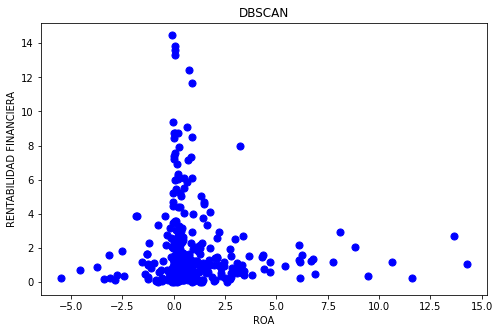

In [ ]:
y_ANTES=model_dbs_ANTES.fit_predict(x_ANTES)
plt.figure(figsize=(8,5))
colores = ['blue','red','green','cyan','pink','orange','purple']
for i in range(7):
  plt.scatter(x_ANTES[y_ANTES==i,0], x_ANTES[y_ANTES==i,1], s=50,c=colores[i])
plt.xlabel('ROA')
plt.ylabel("RENTABILIDAD FINANCIERA")
plt.title("DBSCAN")
plt.show()

**Análisis**

se puede ver en los años 2017-2018 laa mayores totalidades de capital son pocas pero con una alta rentabilidad lo que garantiza en el trascurso del tiempo su viabilidad en las empresas

###**DESPUES DE PANDEMIA**

In [ ]:
x_DURANTE = DURANTE_PANDEMIA.iloc[:,[33,8]].values
x_DURANTE

array([[ 3.6940536e-01,  2.7147322e+01],
       [-4.7054797e-02,  1.0989193e-01],
       [-5.3672330e-04,  2.0040238e+00],
       [ 3.2604954e-03,  5.4372439e+00],
       [ 1.4179248e-02,  4.7290391e-01],
       [ 3.7596192e-02,  1.7684900e+01],
       [ 2.6621321e-01,  1.8401576e+00],
       [-2.4983566e-02,  1.4122696e-01],
       [ 1.8281497e-01,  7.3645294e-01],
       [ 3.6991071e-02,  5.5987823e-01],
       [ 8.6781807e-02,  1.2227825e+00],
       [-3.1309254e-02,  8.8705658e+01],
       [ 2.8306416e-01,  8.0488312e-01],
       [ 1.2975408e-02,  2.7037556e+00],
       [-3.1291947e-01,  1.3771911e-01],
       [ 2.5067119e-02,  1.4284742e+00],
       [ 9.9528879e-01,  5.3319569e+00],
       [ 1.4742523e-01,  4.7528175e-01],
       [ 1.8251775e-02,  2.3936043e+00],
       [ 7.0386268e-02,  9.9729526e-01],
       [ 2.4858925e-01,  5.4630077e-01],
       [ 0.0000000e+00,  2.4142326e-01],
       [ 3.7253827e-02,  8.8181365e-01],
       [ 1.3267921e-01,  6.2123218e+00],
       [ 7.98598

In [ ]:
dbs_DURANTE = DBSCAN(eps=4,min_samples=10)

In [ ]:
model_dbs_DURANTE = dbs_DURANTE.fit(x_DURANTE)

In [ ]:
model_dbs_DURANTE.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

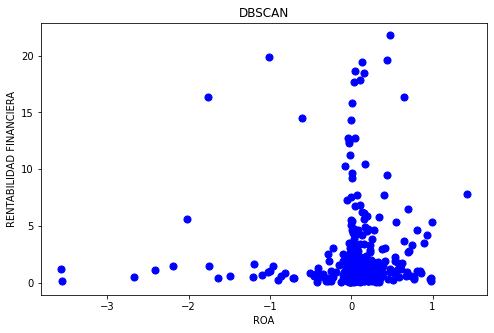

In [ ]:
y_DURANTE=model_dbs_DURANTE.fit_predict(x_DURANTE)
plt.figure(figsize=(8,5))
colores = ['blue','red','green','cyan','pink','orange','purple']
for i in range(7):
  plt.scatter(x_DURANTE[y_DURANTE==i,0], x_DURANTE[y_DURANTE==i,1], s=50,c=colores[i])
plt.xlabel('ROA')
plt.ylabel("RENTABILIDAD FINANCIERA")
plt.title("DBSCAN")
plt.show()

#### **Análisis**
Como se puede ver en la grafica existe mayor baja de totalidad de capital pero su rentabilidad sigue siendo altas 

*   Aunque existe bajas que pueden ser empresas pequeñas que son las empresas que mas en quiebra quedaron por tener muy baja utilidades y muy pocas ventas

## **CLUSTER - EM - Expectation – Maximization**

###**ANTES DE PANDEMIA**

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

X1_ANTES = new_dfa_ANTES['ROA']
X2_ANTES = new_dfa_ANTES['ROTACIÓN DE VENTAS']
X_ANTES = np.hstack((X1_ANTES,X2_ANTES))
modelo = GaussianMixture(n_components=4, init_params='random', tol=0.000001, max_iter=100)
x_ANTES = np.expand_dims(X_ANTES,1)
modelo.fit(x_ANTES)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


GaussianMixture(init_params='random', n_components=4, tol=1e-06)

Normal_distb 1: μ = -0.0055, σ = 0.15, weight = 0.45
Normal_distb 2: μ = -0.48, σ = 0.091, weight = 0.28
Normal_distb 3: μ = 0.53, σ = 0.53, weight = 0.21
Normal_distb 4: μ = 0.44, σ = 3.6, weight = 0.06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


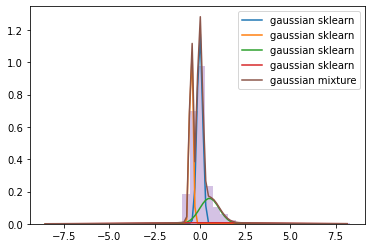

In [ ]:
from scipy.stats import norm
import seaborn as sns

start_ANTES = X_ANTES.min()
end_ANTES = X_ANTES.max()
num_ANTES = 112
x_list_ANTES = np.arange(start_ANTES, end_ANTES, (end_ANTES - start_ANTES) / float(num_ANTES))

Gaussian_nr = 1
for mu_ANTES, sd_ANTES, p_ANTES in zip(modelo.means_.flatten(), np.sqrt(modelo.covariances_.flatten()), modelo.weights_):
    print('Normal_distb {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu_ANTES, sd_ANTES, p_ANTES))
    g_s = norm(mu_ANTES, sd_ANTES).pdf(x_list_ANTES) * p_ANTES
    plt.plot(x_list_ANTES, g_s, label="gaussian sklearn");
    Gaussian_nr += 1

sns.distplot(x_ANTES, bins=40, kde=False, norm_hist=True)
gmm_sum_ANTES = np.exp([modelo.score_samples(e.reshape(-1, 1)) for e in x_list_ANTES]) 
plt.plot(x_list_ANTES, gmm_sum_ANTES, label="gaussian mixture");
plt.legend();

In [ ]:
X = np.column_stack((X1_ANTES,X2_ANTES))
modelo.fit(X)
new_dfa_ANTES['EM'] = modelo.predict(X)

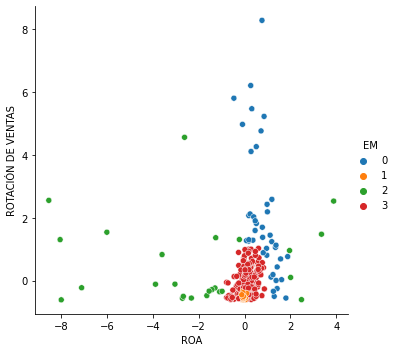

In [ ]:
sns.relplot(x='ROA',y='ROTACIÓN DE VENTAS', data=new_dfa_ANTES, hue='EM', height=5,palette="tab10")

#### **Análisis**
Por el mal manejo sus utilidades como sus patrimonios no existe una rentabilidad alta 
 primero por el mal usos de sus patrimonio esto permite dividir esos ingresos

*  Según la cantidad de dinero que se necesito, lo cual puede ser los altos precios de ventas del sector inmobiliario  que no cambian en los transcurso de los años esto hace que existan muy pocas ganancias 

*   Otro punto puede ser es como no existe una gran cantidad en los endeudamiento no tienen muy altos su liquidez lo cual no hay rotacion de cartera

###**DESPUES DE PANDEMIA**

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

X1_DURANTE = new_dfa_DURANTE['ROA']
X2_DURANTE= new_dfa_DURANTE['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ']
X_DURANTE = np.hstack((X1_DURANTE,X2_DURANTE))
modelo = GaussianMixture(n_components=4, init_params='random', tol=0.000001, max_iter=100)
x_DURANTE = np.expand_dims(X_DURANTE,1)
modelo.fit(x_DURANTE)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


GaussianMixture(init_params='random', n_components=4, tol=1e-06)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Normal_distb 1: μ = -0.066, σ = 0.28, weight = 0.36
Normal_distb 2: μ = -0.052, σ = 0.16, weight = 0.46
Normal_distb 3: μ = 0.61, σ = 1.2, weight = 0.17
Normal_distb 4: μ = -7.6, σ = 5.0, weight = 0.0077


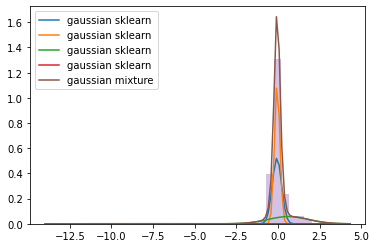

In [ ]:
from scipy.stats import norm
import seaborn as sns

start_DURANTE = X_DURANTE.min()
end_DURANTE = X_DURANTE.max()
num_DURANTE = 112
x_list_DURANTE = np.arange(start_DURANTE, end_DURANTE, (end_DURANTE - start_DURANTE) / float(num_DURANTE))

Gaussian_nr = 1
for mu_DURANTE, sd_DURANTE, p_DURANTE in zip(modelo.means_.flatten(), np.sqrt(modelo.covariances_.flatten()), modelo.weights_):
    print('Normal_distb {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format(Gaussian_nr, mu_DURANTE, sd_DURANTE, p_DURANTE))
    g_s = norm(mu_DURANTE, sd_DURANTE).pdf(x_list_DURANTE) * p_DURANTE
    plt.plot(x_list_DURANTE, g_s, label="gaussian sklearn");
    Gaussian_nr += 1

sns.distplot(x_DURANTE, bins=40, kde=False, norm_hist=True)
gmm_sum_DURANTE = np.exp([modelo.score_samples(e.reshape(-1, 1)) for e in x_list_DURANTE]) 
plt.plot(x_list_DURANTE, gmm_sum_DURANTE, label="gaussian mixture");
plt.legend();

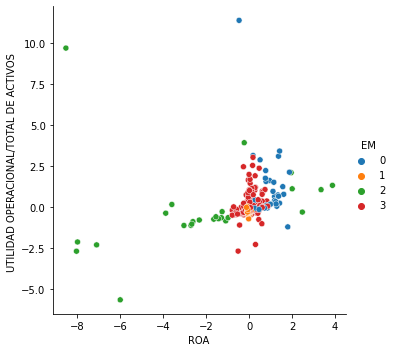

In [ ]:
sns.relplot(x='ROA',y='UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ', data=new_dfa_ANTES, hue='EM', height=5,palette="tab10")

#### **Análisis**
Como se puede ver en la grafica existe mayores gastos en sus inmobiliarias lo cual no existe un gran flujo en sus ingresos anuales y hace que exista mas perdidas que  ganancias

*   Esto puede ser por mantener los costos operacionales muy altos esto  perjudica la rentabilidad del negocio y sus utilidades

#**REGRESIONES**

##**REGRESION LINEAL**

###**DERIVAR FEATURES ADICIONALES**

In [ ]:
dfs_data = data_sectorInmobiliario[['NOMBRE','UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ENDEUDAMIENTO PATRIMONIAL','ROTACIÓN DE VENTAS','ROA']]
dfs_data.columns = ['NOMBRE','UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS','ENDEUDAMIENTO PATRIMONIAL','ROTACIÓN DE VENTAS','ROA']
#dfs.fillna(method='ffill', inplace=True)
dfs_data.dropna(inplace=True)
dfs_data.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,NOMBRE,UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS,ENDEUDAMIENTO PATRIMONIAL,ROTACIÓN DE VENTAS,ROA
3,V&C CONSTRUCTORES CIA. LTDA.,0.002733,3.789191,0.070186,0.000880
7,PARQUE INDUSTRIAL IMBABURA SA,0.045585,0.007811,0.154067,0.085583
21,INMOBILIARIA SANTA PRISCA SA,-0.068310,1.691696,0.241397,-0.038027
97,INMOBILIARIA SANTA RITA C LTDA,0.026774,0.033179,0.247540,0.016651
215,AZUAY NUEVO MILENIO (ANUMIL) S.A.,0.180017,0.137949,0.284856,0.002072
239,INMOBILIARIA NORTENA SAIN SA,-0.005986,1.070324,0.014235,-0.005770
408,SALCEDO INTERNACIONAL (INTERSAL) S.A.,0.007445,1.512754,0.135204,0.004562
524,ARBUSTA C LTDA,0.628550,0.401477,1.096599,0.010608
622,VIVIENDAS MASIVAS ECUATORIANAS VIMARE SA,0.000856,0.161856,0.014000,0.417937
692,"DESAGREC, DESARROLLO AGROINDUSTRIAL DEL ECUADO...",0.149066,0.240751,0.306506,0.014526


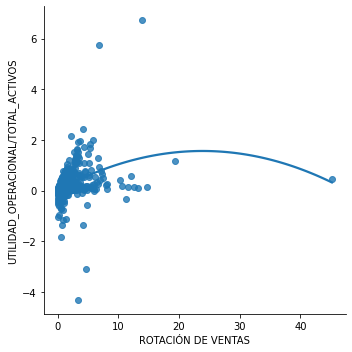

In [ ]:
sns.lmplot(x='ROTACIÓN DE VENTAS' ,y="UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS" , data=dfs_data,order=2,ci=None)

Se puede ver que en la grafica existe una correlacion 0.1 a 10 de venta con una utlidades  mas altas que bajas lo cual puede ser empresas que se han quebrado en años de pandemias, solo una empresa mediana se ha podido mantener y adaptarse ya que se puede ver que ha tenido aumento de ventas aunque sus utlidades son bajas

In [ ]:
columnas_x = ['ENDEUDAMIENTO PATRIMONIAL','ROTACIÓN DE VENTAS']

In [ ]:
x= dfs_data[columnas_x].to_numpy()
y= dfs_data['UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS'].to_numpy()

In [ ]:
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.80, random_state=0)

In [ ]:
model_reg = LinearRegression()
model_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_reg.score(x_test,y_test)

0.15149778619039334

In [ ]:
y_pred = model_reg.predict(x_test) 
#plt.scatter(x_test,y_test,color='b')
#plt.plot(x_test, y_pred,color='r')
plt.show()

Se puede ver que hay problemas de dispersión entre la varianza de los residuos aumenta con los valores ajustados, esto indica que la variabilidad de los errores aumenta al aumentar su media o sus utilidades.

###**ENTRENAMIENTO**

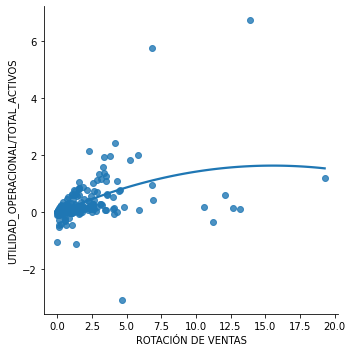

In [ ]:
dfsp=dfs_data[:][:350]
sns.lmplot(x='ROTACIÓN DE VENTAS', y='UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS', data=dfsp, order=2, ci=None)

In [ ]:
x= np.array(dfsp['ROTACIÓN DE VENTAS']).reshape(-1,1)
y= np.array(dfsp['UTILIDAD_OPERACIONAL/TOTAL_ACTIVOS']).reshape(-1,1)
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.20)

In [ ]:
model_reg = LinearRegression()
model_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_reg.score(x_test,y_test)

0.15509326899283316

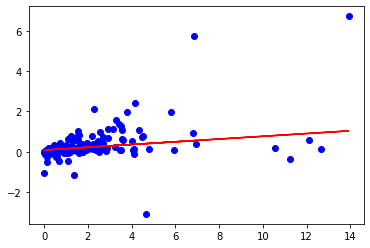

In [ ]:
y_pred = model_reg.predict(x_test) 
plt.scatter(x_test,y_test,color='b')
plt.plot(x_test, y_pred,color='r')
plt.show()

Con datos menores de las empresas para entrenamiento se puede ver que aun existe muy bajo su error relativo lo cual se puede que existe un mal manejo en sus capital y en su endeudamiento ya que que existe ventas pero su utlidades no aumentan.

###**ERROR**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(
    'MAE: ', mae, 
    '\nMSE: ', mse,
    '\nRMAE: ', rmse,
)

MAE:  0.24739772325204967 
MSE:  0.37656220734850804 
RMAE:  0.61364664697895


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errores')

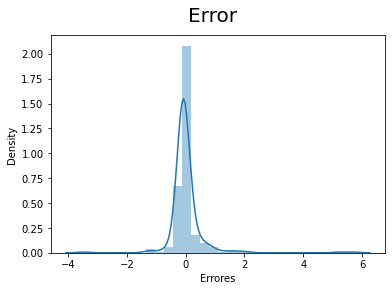

In [ ]:
error = plt.figure()
sns.distplot((y_test - y_pred), bins = 30)
error.suptitle('Error', fontsize = 20)                  
plt.xlabel('Errores', fontsize = 10) 

Esto puede ser tanto por los endeumiento que han tenido en los 2019-2020 o por motivos que tuvieron que bajar sus precios para poder vender y no quebrar, poder solventarse , no han podido crecer sus utilidades 


##**REGRESION LOGISTICA**

In [ ]:
dfs_data_LOGISTICA = data_sectorInmobiliario[['UTILIDAD OPERACIONAL/TOTAL DE ACTIVOS ','ENDEUDAMIENTO PATRIMONIAL','ROTACIÓN DE VENTAS','ROA']]
dfs_data_LOGISTICA.columns = ['UTILIDAD_OPERACIONAL_TOTAL_ACTIVOS','ENDEUDAMIENTO_PATRIMONIAL','ROTACIÓN_VENTAS','ROA']

#dfs_data_LOGISTICA['UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS'] = (dfs_data_LOGISTICA['UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS'] /  dfs_data_LOGISTICA['UTILIDAD_OPERACIONAL_TOTAL DE ACTIVOS'].sum()) * 100
dfs_data_LOGISTICA['NIVEL_UTILIDAD'] = (dfs_data_LOGISTICA['UTILIDAD_OPERACIONAL_TOTAL_ACTIVOS'] ) * 1000

dfs_data_LOGISTICA.loc[ (( dfs_data_LOGISTICA.NIVEL_UTILIDAD <= 31)),'NIVEL_UTILIDAD']= 1
dfs_data_LOGISTICA.loc[ ((dfs_data_LOGISTICA.NIVEL_UTILIDAD >= 31 ) & ( dfs_data_LOGISTICA.NIVEL_UTILIDAD <= 60)),'NIVEL_UTILIDAD']= 2
dfs_data_LOGISTICA.loc[ (dfs_data_LOGISTICA.NIVEL_UTILIDAD >= 61 ),'NIVEL_UTILIDAD']= 3

dfs_data_LOGISTICA.dropna(inplace=True)
dfs_data_LOGISTICA['NIVEL_UTILIDAD'] = dfs_data_LOGISTICA['NIVEL_UTILIDAD'].astype('int64')

dfs_data_LOGISTICA.head(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,UTILIDAD_OPERACIONAL_TOTAL_ACTIVOS,ENDEUDAMIENTO_PATRIMONIAL,ROTACIÓN_VENTAS,ROA,NIVEL_UTILIDAD
3,0.002733,3.789191,0.070186,0.000880,1
7,0.045585,0.007811,0.154067,0.085583,2
21,-0.068310,1.691696,0.241397,-0.038027,1
97,0.026774,0.033179,0.247540,0.016651,1
215,0.180017,0.137949,0.284856,0.002072,3
239,-0.005986,1.070324,0.014235,-0.005770,1
408,0.007445,1.512754,0.135204,0.004562,1
524,0.628550,0.401477,1.096599,0.010608,3
622,0.000856,0.161856,0.014000,0.417937,1
692,0.149066,0.240751,0.306506,0.014526,3


In [ ]:
#x= np.array(dfs_data_LOGISTICA['ENDEUDAMIENTO_PATRIMONIAL']).reshape(-1,1)
#y= np.array(dfs_data_LOGISTICA['NIVEL_UTILIDAD']).reshape(-1,1)
columnas_x_log = ['ENDEUDAMIENTO_PATRIMONIAL','ROTACIÓN_VENTAS']
x1 = dfs_data_LOGISTICA[columnas_x_log].to_numpy()
y1 = dfs_data_LOGISTICA['NIVEL_UTILIDAD'].to_numpy()

350


(array([  1., 272.,  69.,   6.,   0.,   2.]),
 array([-3.0739527, -1.442057 ,  0.1898387,  1.8217344,  3.4536301,
         5.0855258,  6.7174215]),
 <a list of 6 Patch objects>)

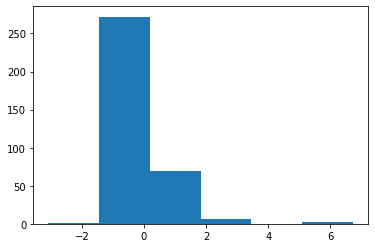

In [ ]:
print(len(y))
plt.hist(y,bins=6)

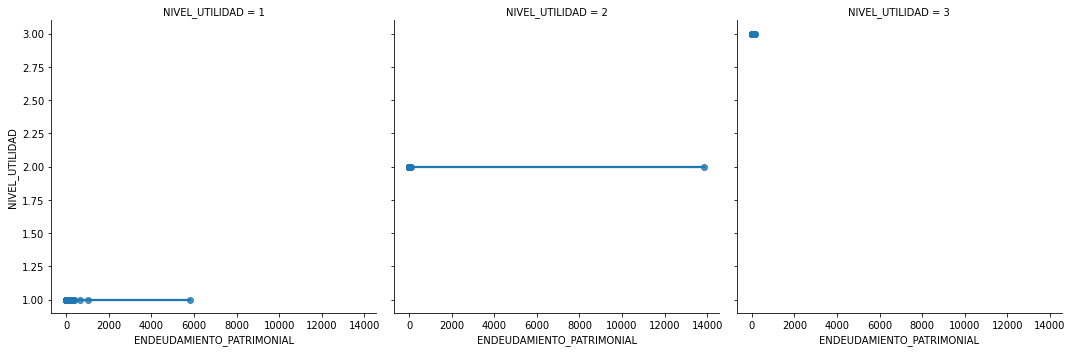

In [ ]:
sns.lmplot(x='ENDEUDAMIENTO_PATRIMONIAL', y='NIVEL_UTILIDAD',col='NIVEL_UTILIDAD' ,data=dfs_data_LOGISTICA, order=1, ci=None)

Con la grafica se puede identificar que por los niveles de utilidades que:

1.   Nivel de 0% a 30% tienen un mediano endeudamiento patrimonial  1000 y un pico alto de 6000 
2.   Nivel de 31% a 60% tienen un mediano endeudamiento patrimonial  1000 y un pico alto de 14000 
3.    Nivel de 61% a 100% tienen un mediano endeudamiento patrimonial  1000 lo cual tienen muy pocas deudas y mayor utilidad, alto rendimiento (empresas medianas)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.80)

In [ ]:
model = LogisticRegression().fit(x_train,y_train)

In [ ]:
model.score(x_train,y_train)

0.6703910614525139

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[1 3 3 1 3 1 3 1 1 1 3 3 3 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 3 1 3 1 1 3 3 1 3
 1 3 3 3 1 3 3 1 1 1 3 3 3 3 3 3 1 1 1 3 1 3 1 3 1 3 1 1 3 1 1 3 3 3 1 1 3
 1 1 3 3 3 3 1 3 1 3 1 3 3 1 3 3 1 3 1 3 3 3 3 1 3 1 1 1 1 1 3 3 1 3 3 3 1
 3 1 1 3 3 1 1 1 1 3 1 3 3 1 1 3 3 1 1 1 3 3 1 1 1 3 1 1 3 3 1 3 3 1 3 3 3
 1 1 1 3 3 1 3 1 1 3 1 3 3 3 1 1 1 3 1 3 3 1 1 3 3 1 3 1 1 1 3 3 1 3 1 1 3
 1 3 3 3 1 3 1 3 3 1 3 1 3 1 3 1 1 1 3 3 1 1 1 1 3 1 1 1 3 1 3 3 1 3 3 3 1
 3 1 1 1 1 1 1 3 3 3 1 1 3 1 3 3 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3
 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 1 1 1 3 1 1 1 1 1 1 3 1 1 3 1 1
 3 3 1 1 3 1 1 1 1 1 3 1 3 3 1 3 1 1 1 3 1 3 3 3 3 3 1 1 3 3 3 3 3 1 1 3 3
 3 1 1 3 1 1 1 1 1 3 3 1 1 3 3 1 1 1 1 1 1 3 3 3 1 1 3 3 1 3 1 1 1 3 1 1 1
 1 3 1 1 1 3 3 3 1 3 1 3 3 3 1 1 1 3 1 1 3 1 3 1 3 3 1 3 3 3 3 1 1 1 3 3 1
 1 1 1 3 1 3 1 1 1 3 1 3 1 1 1 3 3 3 3 1 1 1 1 1 1 3 1 1 1 3 1 3 3 1 3 3 3
 3 1 3 1 1 3 3 3 1 3 1 1 1 1 1 1 3 3 3 3 1 1 1 3 1 1 3 1 1 1 1 1 3 1 3 3 1
 1 1 1 3 1 3 1 1 3 1 1 1 

In [ ]:
y_predt = model.predict_proba(x_test)
print(y_predt)

[[0.53669021 0.10275068 0.3605591 ]
 [0.01330391 0.05039059 0.9363055 ]
 [0.44651036 0.10180505 0.45168459]
 ...
 [0.08975967 0.08665943 0.8235809 ]
 [0.57029861 0.09566196 0.33403943]
 [0.17305311 0.10115866 0.72578823]]


In [ ]:
model.score(x_test,y_test)

0.6222222222222222

###**Error**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print("MAE",mae)
print("MSE", mse)
print("RMSE",rmse)

MAE 0.6194444444444445
MSE 1.1027777777777779
RMSE 1.0501322668015576


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errores')

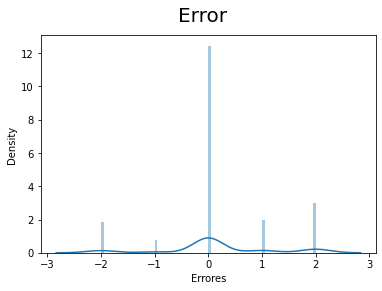

In [ ]:
error = plt.figure()
sns.distplot((y_test - y_pred), bins = 80)
error.suptitle('Error', fontsize = 20)                  
plt.xlabel('Errores', fontsize = 10) 

**Análisis**

Se puede demostrar que existe que las empresas tienen un alto pocertanje del 31% a 60% que estan las empresas entre medianas y muy pocas las empresas grandes con un error elevado:


*   Como las empresas pequeñas que son las que mas quebraron por un mal  manejo de adaptacion a las ventas en los transcursos de los años 2019-2020 aunque se puede ver en las demas graficas la empresas pequeñas como grandes tenian muy baja rotacion de ventas en los años 2017-2018  

# **Conclusión**


1.   En la limpieza de datos, no era preciso eliminar todas las filas que poseen un dato vacios o  NaN, en lugar de eso se decidio seleccionar las columnas que vamos  utiliar y eliminar que tienen en todas sus filas NaN
2.   El el gráfico de calor las variables que mas presentan relación son el ROA ,Endeudamiento, deudas, Rentabilidad Financiera, rotacion de ventas y  Utilidades  estas variables son necesarias para el análisis de probabilidades, correlacion de datos como su regresion
3. Su regresion de lineal de variables continuas se utilizo las variables independientes X=( endeudamiento patriomonial,rotacion de ventas) y las variables dependientes Y=(ROA,utilidades)
4. Su regresion logistica  de variables discretas se utilizo las variables independientes X=( endeudamiento patriomonial,rotacion de ventas) y las variables dependientes Y=(nivel_utilidad (0-30% = 1 , 31%-60% = 2 , 61%-100% = 3 ) )


